¡Hola Diana! Como te va? Espero que todo bien.

Mi nombre es Emanuel Fitta! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Pues nada Diana, realmente te quiero felicitar por el gran trabajo que realizaste! Has demostrado un gran avance en el uso de pandas como herramienta para transformar y limpiar datos. Otra cosa por la que te reitero mi felicitación es por tener el hábito de ir colocando tus conclusiones y observaciones en cada paso que das, este es un gran hábito que te ayudará mucho en el futuro! Que ademas son conclusiones muy atinadas y lo suficientemente profundas. Se nota el esfuerzo que pusiste en el proyecto y la capacidad de análisis que estás adquiriendo. En verdad, fue un gusto el revisar tu notebook.

Deseo que tengas un gran gran día! Mucho éxito!

# Descripción del proyecto

Showz, es una empresa de venta de entradas de eventos. Se solicita optimizar los gastos de marketing.<br>
Se cuenta con:<br>
•	Registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;<br>
•	Un archivo con los pedidos en este periodo;<br>
•	Estadísticas de gastos de marketing.

## Inicialización

In [1]:
# Importar librerías 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_visits = pd.read_csv('/datasets/visits_log_us.csv')
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_costs = pd.read_csv('/datasets/costs_us.csv')

## Información de los Datos

### DataFrame de Visitas

In [3]:
# Obtener las primeras filas del DataFrame de Visitas
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
# Obtener la información general sobre los datos
df_visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [5]:
# Cambiar los nombres de las columnas 
df_visits.columns = df_visits.columns.str.replace(' ', '_').str.lower()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Excelente! Es una buena práctica el que los nombres de las columnas estén en formato snake case.

In [6]:
# Obtener más información
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [7]:
# Cambiar el tipo de datos
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Y también transformar a formato de fecha es algo que te evitará problemas más adelante así que muy bien pro prever esta situación.

In [8]:
# Verificar si hay duplicados
df_visits.duplicated().sum()

0

**Descripción del Dataset** `df_visits`

Este dataset está compuesto por 359,400 filas y 5 columnas:

- `uid`: identificador único del usuario.
- `device`: tipo de dispositivo utilizado para la visita (por ejemplo, “touch” o “desktop”).
- `start_ts`: fecha y hora de inicio de la sesión.
- `end_ts`: fecha y hora de término de la sesión.
- `source_id`: identificador de la fuente de tráfico o canal de entrada de la visita.<br><br>

→ No hay valores nulos en ninguna de las columnas, ya que todas las filas contienen datos completos en todos los campos.<br>
→ No se encontraron duplicados en el dataset, lo que significa que cada fila representa una visita única sin registros repetidos.<br>
→ La columna source_id tiene un rango de valores entre 1 y 10, lo cual indica que hay múltiples canales de tráfico; con una media de 3.75, la mayor parte de las visitas parecen provenir de fuentes con identificadores más bajos.<br>
→ La información de las marcas de tiempo (start_ts y end_ts) permite calcular la duración de cada visita.<br> 
→ La columna device permite identificar diferencias en el uso por tipo de dispositivo, lo cual puede ser útil para entender la preferencia de los usuarios y optimizar la experiencia de usuario.<br><br>

Normalización de nombres de columnas: Se renombraron las columnas para estandarizarlas, reemplazando los espacios por guiones bajos y usando minúsculas, lo cual facilita el manejo de los datos en distintos entornos.<br>

Se modificó el tipo de datos de las columnas `start_ts` y `end_ts` a formato de fecha y hora para permitir operaciones de filtrado y agrupación por fechas o rangos de tiempo de manera más eficiente.

***Conclusiones:*** 
El dataset está en buen estado, ya que no presenta errores evidentes como duplicados o valores nulos. Además, la estructura del dataset es adecuada para explorar patrones de duración de visitas y comportamiento según el dispositivo, lo cual puede ser útil en análisis posteriores.

### DataFrame de Ordenes

In [9]:
# Obtener las primeras filas del DataFrame de Ordenes
df_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
# Obtener la información general sobre los datos
df_orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [11]:
# Cambiar los nombres de las columnas 
df_orders.columns = df_orders.columns.str.replace(' ', '_').str.lower()

In [12]:
# Obtener más información
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [13]:
# Cambiar el tipo de datos
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [14]:
# Verificar si hay duplicados
df_orders.duplicated().sum()

0

**Descripción del Dataset** `df_orders`

Este dataset está compuesto por 50,415 filas y 3 columnas:

- `uid`: identificador único del usuario que realiza un pedido.
- `buy_ts`: fecha y hora del pedido.
- `revenue`: ingreso generado por cada compra.<br>

→ No hay valores nulos en ninguna de las columnas, ya que todas las filas contienen datos completos.<br> 
→ No se encontraron filas duplicadas en el dataset, lo que asegura que cada fila representa una compra única.<br>
→ La columna revenue muestra una amplia variabilidad en los ingresos de cada compra, con un mínimo de 0 (posibles compras sin costo) y un máximo de 2,633.28. El ingreso promedio es de 4.99, con una desviación estándar de 21.82, lo que indica una dispersión considerable en los montos de compra.<br>
→ El 50% de las compras generan un ingreso menor a 2.5, y el 75% de las compras no superan los 4.89, lo cual sugiere que la mayoría de las transacciones son de bajo valor, con algunas excepciones de ingresos mucho mayores.<br>

Normalización de nombres de columnas: Se renombraron las columnas para estandarizarlas, reemplazando los espacios por guiones bajos y usando minúsculas, facilitando así la integración y manejo de los datos en distintas plataformas.

Se modificó el tipo de datos de la columna `buy_ts` a formato de fecha y hora para permitir operaciones de filtrado y agrupación por fechas o rangos de tiempo de manera más eficiente.

***Conclusiones:*** El dataset no presenta errores evidentes como duplicados o valores nulos. La gran variabilidad en los valores de revenue indica que la mayoría de las transacciones tienen montos bajos, aunque algunas generan ingresos significativamente más altos. Esta información es útil para analizar la distribución de ingresos por compra y entender el comportamiento de los usuarios en relación con el valor de sus compras.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Veo que seguiste las buenas prácticas del primer dataframe. Además quiero felicitarte por colocar conclusiones tan atinadas sobre lo que vas observando del procedimiento realizado. 
    

### DataFrame de Gastos de Marketing

In [15]:
# Obtener las primeras filas del DataFrame de Gastos de Marketing
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [16]:
# Obtener la información general sobre los datos
df_costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [17]:
# Obtener más información
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [18]:
# Cambiar el tipo de datos
df_costs['dt'] = pd.to_datetime(df_costs['dt'])
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [19]:
# Verificar si hay duplicados
df_costs.duplicated().sum()

0

**Descripción del Dataset** `df_costs`

Este dataset está compuesto por 2,542 filas y 3 columnas:

- `source_id`: identificador de la fuente de anuncios.
- `dt`: fecha en la que se registró el gasto.
- `costs`: gastos en esta fuente de anuncios en este día.<br>

→ No hay valores nulos en las columnas, lo que indica que cada registro está completo.<br>
→ No se encontraron filas duplicadas en el dataset, garantizando que cada fila representa un gasto único por fuente y fecha.<br>
→ La columna costs muestra una alta variabilidad en los gastos de marketing, con valores que van desde un mínimo de 0.54 hasta un máximo de 1,788.28. El promedio de gastos es de 129.48, con una desviación estándar de 156.30, sugiriendo una distribución dispersa con algunos gastos considerablemente más altos.<br>
→ El 50% de los gastos están por debajo de 77.3, mientras que el 75% de los registros no superan los 170.06, lo que sugiere que, aunque la mayoría de los gastos son bajos, hay registros de gastos significativamente altos que elevan el promedio.<br>

Se modificó el tipo de datos de la columna `dt` a formato de fecha y hora para permitir operaciones de filtrado y agrupación por fechas o rangos de tiempo de manera más eficiente.

***Conclusiones:*** El dataset está en buen estado, ya que no presenta duplicados ni valores nulos. La alta variabilidad en los valores de costs sugiere una amplia dispersión en los montos de gastos de marketing, con algunas fuentes o fechas mostrando valores considerablemente más altos que otras. Este patrón es importante para analizar la eficiencia y retorno de inversión en cada fuente o campaña de marketing.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

De nueva cuenta, bien realizado!! Me gusta que hayas interpretado correctamente las estadísticas básicas obtenidas con el método describe.

# Calculo de Métricas

## Visitas

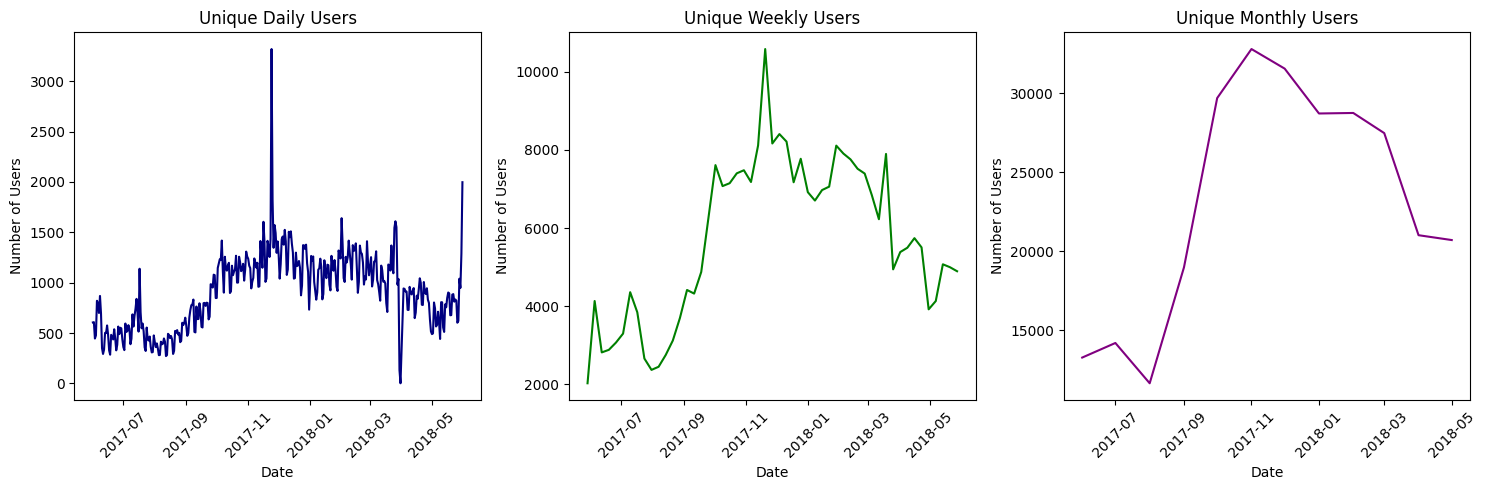

In [20]:
# Cantidad de personas que usan la plataforma cada día, semana y mes.
user_day = df_visits.groupby(df_visits['start_ts'].dt.date)['uid'].nunique()
user_week = df_visits.groupby(df_visits['start_ts'].dt.to_period('W'))['uid'].nunique()
user_month = df_visits.groupby(df_visits['start_ts'].dt.to_period('M'))['uid'].nunique()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Usuarios diarios
axs[0].plot(user_day.index, user_day.values, label="Daily users", color="navy")
axs[0].set_title("Unique Daily Users")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Number of Users")
axs[0].tick_params(axis='x', rotation=45)

# Usuarios semanales
axs[1].plot(user_week.index.to_timestamp(), user_week.values, label="Weekly users", color="green")
axs[1].set_title("Unique Weekly Users")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Number of Users")
axs[1].tick_params(axis='x', rotation=45)

# Usuarios mensuales
axs[2].plot(user_month.index.to_timestamp(), user_month.values, label="Monthly users", color="purple")
axs[2].set_title("Unique Monthly Users")
axs[2].set_xlabel("Date")
axs[2].set_ylabel("Number of Users")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Usuarios Diarios:** La primera gráfica muestra una tendencia general al alza en los usuarios únicos diarios desde mediados de 2017 hasta finales de 2017, con un pico muy notable a finales de 2017 (posiblemente por promociones y/o la temporada navideña).  Después, la cantidad de usuarios diarios presenta fluctuaciones y una disminución progresiva, indicando posibles cambios en el uso diario o factores externos que afectaron la actividad.<br>

**Usuarios Semanales:** La segunda gráfica de usuarios únicos semanales también muestra un crecimiento constante durante 2017, alcanzando un máximo a finales de ese año. Esto sugiere que el crecimiento de usuarios activos semanalmente acompañó la tendencia diaria, pero a una escala mayor. También hubo una caída en usuarios semanales desde inicios de 2018.<br>

**Usuarios Mensuales:** En el tercer gráfico, se observa un incremento pronunciado en los usuarios únicos mensuales hacia finales de 2017, coincidiendo con la temporada navideña. Al inicio de 2018, los usuarios disminuyen gradualmente, sin embargo, se mantienen por encima de los niveles de principios de 2017, lo que indica que la plataforma retuvo parte del aumento navideño.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto!!!! Me gusta muchísimo la manera en que realizaste los gráficos. Utilizaste correctamente la funcionalidad subplots de matplotlib para acomodar los tres gráficos. Felicidades. Por otro lado, las conclusiones que obtuviste de estos gráficos son bastante buenas. Pienso que estás realizando un gran proyecto.

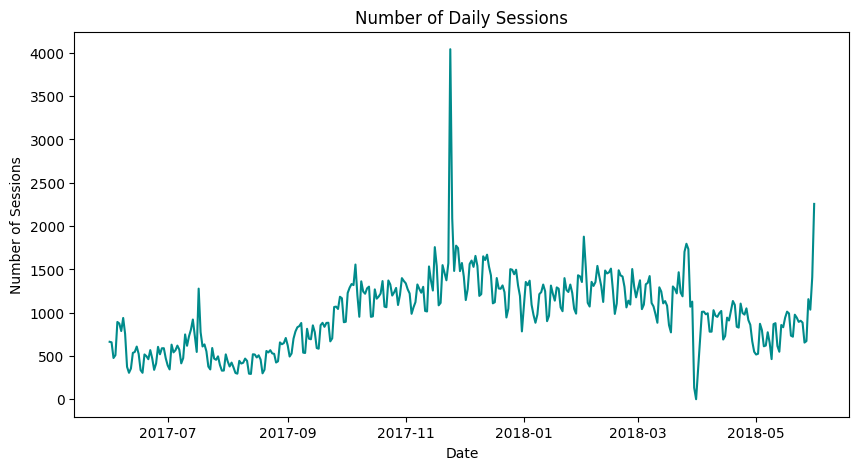

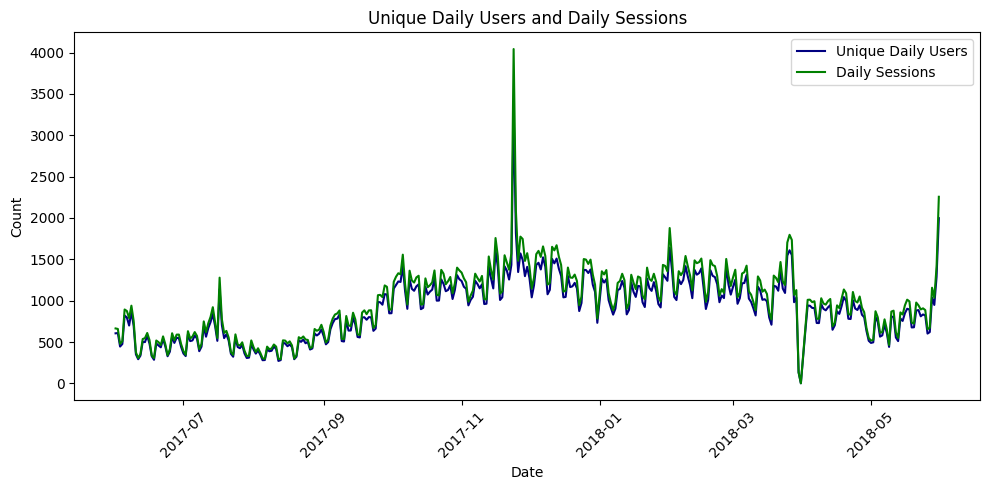

In [21]:
# Cantidad de sesiones por día (Un usuario puede tener más de una sesión).
session_day =df_visits.groupby(df_visits['start_ts'].dt.date)['uid'].count()

# Visualización de cantidad de sesiones por día
plt.figure(figsize=(10, 5))
plt.plot(session_day.index, session_day.values, label="Sessions per Day", color="darkcyan")
plt.title("Number of Daily Sessions")
plt.xlabel("Date")
plt.ylabel("Number of Sessions")
plt.show()

# Quiero ver que tan parecidas son las gráficas
plt.figure(figsize=(10, 5))

# Graficar usuarios únicos diarios
plt.plot(user_day.index, user_day.values, label="Unique Daily Users", color="navy")

# Graficar sesiones diarias
plt.plot(session_day.index, session_day.values, label="Daily Sessions", color="green")

# Títulos y etiquetas
plt.title("Unique Daily Users and Daily Sessions")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tick_params(axis='x', rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

**Conclusión:** El gráfico *"Number of Daily Sessions"* muestra un aumento en la cantidad de sesiones diarias durante 2017, con un pico notable hacia finales del año, probablemente relacionado con la temporada navideña. A partir de 2018, las sesiones comienzan a disminuir de manera gradual y presentan una variabilidad diaria significativa.<br>

Dado que los gráficos de "Unique Daily Users" y "Number of Daily Sessions" son similares, se combinan en una misma visualización para facilitar la comparación. Mientras que "Unique Daily Users" cuenta cada usuario único solo una vez al día, "Number of Daily Sessions" refleja el total de sesiones, incluyendo múltiples sesiones de un mismo usuario. Aunque ambos gráficos muestran una tendencia similar con un pico en la misma época, el gráfico de sesiones presenta mayor variabilidad, lo que indica que algunos usuarios aumentaron su frecuencia de uso en periodos de alta actividad.

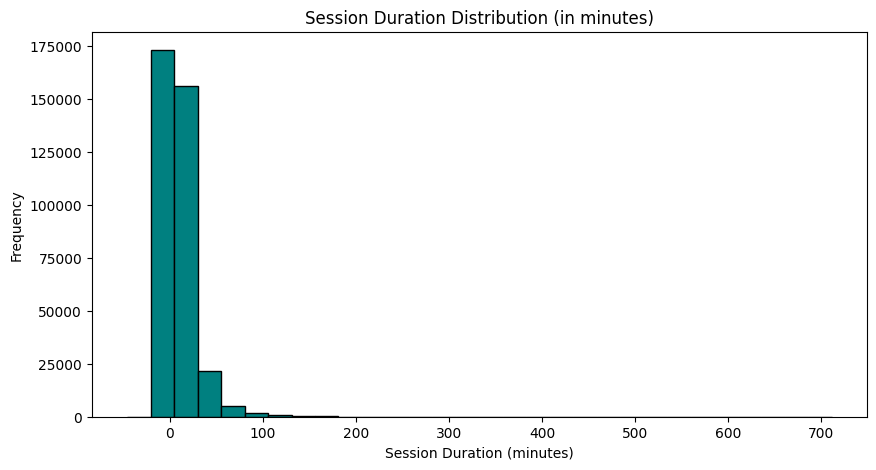

In [22]:
# Duración de cada sesión en minutos
df_visits['session_duration'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.total_seconds() / 60

# Visualización de duración de sesiones
plt.figure(figsize=(10, 5))
plt.hist(df_visits['session_duration'].dropna(), bins=30, color="teal", edgecolor="black")
plt.title("Session Duration Distribution (in minutes)")
plt.xlabel("Session Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

**Conclusión:** La mayoría de las sesiones tienen una duración corta, concentrándose en menos de 100 minutos, con un pico significativo por debajo de los 50 minutos. A medida que la duración de las sesiones aumenta, la frecuencia disminuye rápidamente, lo que sugiere que los usuarios tienden a interactuar en intervalos breves y que solo una minoría permanece por períodos prolongados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! El histograma es justo lo que nos dice, las sesiones más cortas, son las más comunes. Sin emabrgo es muy interesante que existan valores tan altos ¿Qué podrían indicar? ¿Por qué existirán sesiones de tan larga duración?

<div class="alert alert-block alert-info">
<b>Las duraciones extremadamente altas de algunas sesiones podrían indicar que los usuarios dejan la aplicación abierta sin interactuar activamente, ya sea porque la dejan en segundo plano o consultan información sin cerrarla.</b> <a class="tocSkip"></a>
</div>

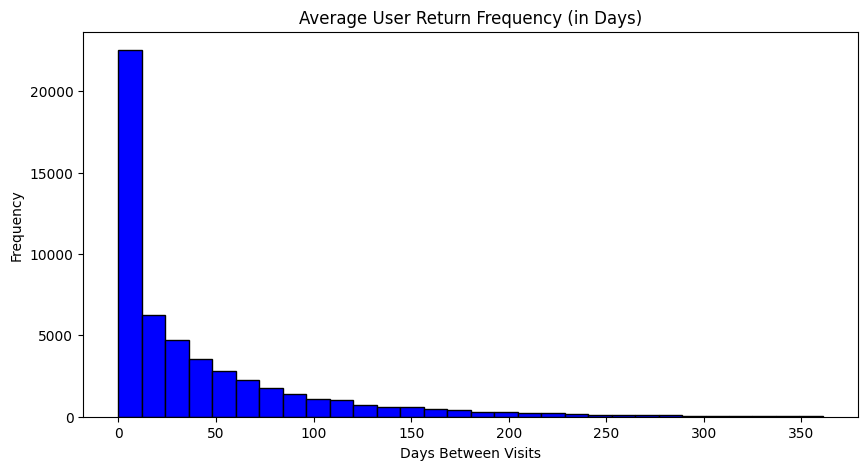

In [23]:
# Frecuencia de retorno de los usuarios

# Filtrar usuarios con más de una visita
active_users = df_visits['uid'].value_counts()[df_visits['uid'].value_counts() > 1].index

# Filtrar df_visits para incluir solo usuarios activos
df_visits_active = df_visits[df_visits['uid'].isin(active_users)]

# Ordenar datos por usuario y tiempo de inicio de sesión
df_visits_active = df_visits_active.sort_values(by=['uid', 'start_ts'])

# Calcular la diferencia en días entre las visitas consecutivas por usuario
df_visits_active['difference_days'] = df_visits_active.groupby('uid')['start_ts'].diff().dt.days

# Filtrar filas con NaN en 'difference_days'
df_visits_filtered = df_visits_active.dropna(subset=['difference_days'])

# Frecuencia promedio de retorno (en días) por usuario
return_freq = df_visits_filtered.groupby('uid')['difference_days'].mean()

# Visualización de la frecuencia promedio de retorno de usuarios
plt.figure(figsize=(10, 5))
plt.hist(return_freq.dropna(), bins=30, color="blue", edgecolor="black")
plt.title("Average User Return Frequency (in Days)")
plt.xlabel("Days Between Visits")
plt.ylabel("Frequency")
plt.show()

**Conclusión:** El gráfico ilustra la frecuencia promedio de retorno de los usuarios, revelando que la mayoría de ellos regresa a la plataforma en un corto período de tiempo. Se observa una alta concentración de usuarios que regresan en los primeros días después de su visita. Sin embargo, también hay un número significativo de usuarios que tardan más en regresar, lo que indica que, mientras muchos usuarios son activos en un corto plazo, otros permanecen inactivos durante períodos prolongados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Esta parece ser una buena señal, el hecho de que los usuarios regresen en un periodo corto de tiempo, sin embargo ¿Qué podríamos hacer para reducir la cantidad de usuarios que no siguen este mismo patrón? Por otro lado, haces un correcto uso de las funciones como groupby. Así que felicidades por ello.

<div class="alert alert-block alert-info">
<b>Se podrían implementar estrategias como recordatorios de contenido o promociones especiales. También ofrecer contenido relevante en momentos claves para incentivar el compromiso.</b> <a class="tocSkip"></a>
</div>

## Ventas

In [24]:
# Obtener la fecha de la primera compra para cada usuario
first_purchase = df_orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase['buy_ts'] = pd.to_datetime(first_purchase['buy_ts'])

# Encontrar la primera sesión de inicio del usuario
df_visits['first_session_start'] = df_visits.groupby('uid')['start_ts'].transform('min')

user_conversion = pd.merge(df_visits[['uid', 'first_session_start']], first_purchase, on='uid', how='left')
user_conversion['days_to_conversion'] = (user_conversion['buy_ts'] - user_conversion['first_session_start']).dt.days
conversion_counts = user_conversion['days_to_conversion'].value_counts().sort_index()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Acá una pequeña sugerencia, normalmente suele ser una buena práctica hacer las transformaciones, como el cambio a tipo de dato, al inicio del notebook. Es un detalle menor, pero puede ayudarte a tener notebooks aún más organizados.

<div class="alert alert-block alert-info">
<b>Hola Emanuel, te refieres a que cuando hago los cambios de datos del Dataset df_orders, agrege de una vez la columna 'buy_ts' para dejarla con el tipo de dato correcto y lista para usar acá??</b> <a class="tocSkip"></a>
</div>

In [25]:
# Clasificar a los usuarios en cohortes
def classify_cohort(days_to_conversion):
    if days_to_conversion == 0:
        return 'Cohort 1: Same Day'
    elif days_to_conversion == 1:
        return 'Cohort 2: Next Day'
    elif 3 <= days_to_conversion <= 10:
        return 'Cohort 3: Day 3 and 10'
    elif days_to_conversion >= 11:
        return 'Cohort 4: After Day 11'
    else:
        return 'No Conversion'

user_conversion['cohort'] = user_conversion['days_to_conversion'].apply(classify_cohort)

# Contar usuarios en cada cohorte
cohort_counts = user_conversion['cohort'].value_counts()

# Definir el orden de las cohortes que deseas mostrar
cohort_order = ['Cohort 1: Same Day',
                'Cohort 2: Next Day',
                'Cohort 3: Day 3 and 10',
                'Cohort 4: After Day 11',
                'No Conversion']

# Reorganizar los conteos según el orden definido
cohort_counts = cohort_counts.reindex(cohort_order)
cohort_counts

Cohort 1: Same Day         48416
Cohort 2: Next Day          3864
Cohort 3: Day 3 and 10      8966
Cohort 4: After Day 11     34223
No Conversion             263931
Name: cohort, dtype: int64

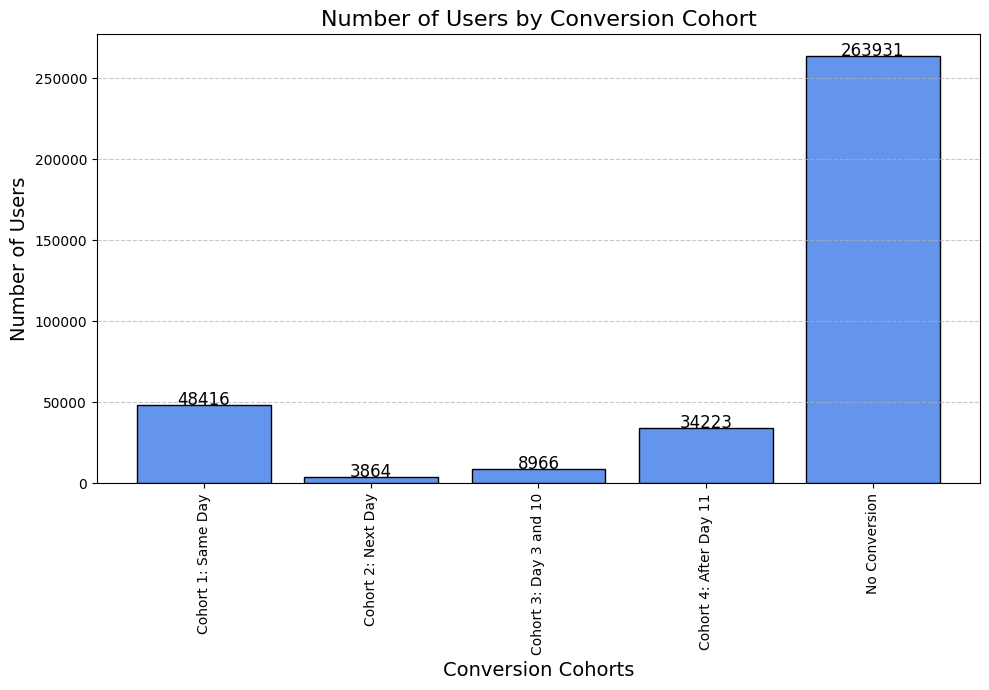

In [26]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 7))

# Crear el gráfico de barras
bars = plt.bar(cohort_counts.index, cohort_counts.values, color='cornflowerblue', edgecolor='black')

# Configurar títulos y etiquetas
plt.title("Number of Users by Conversion Cohort", fontsize=16)
plt.xlabel("Conversion Cohorts", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)

# Añadir etiquetas a las barras
for i, v in enumerate(cohort_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12)

# Ajustar las etiquetas en el eje X para que estén centradas bajo las barras
plt.xticks(ticks=range(len(cohort_counts.index)), labels=cohort_counts.index, rotation=90, ha='center')
    
# Mostrar el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien! Me gusta como usaste el método grid de matplotlib, pienso que ayuda a darle mayor legibilidad a cada una de las barras.  Por otro lado, los cohorts están bien calculados y en el plot es muy fácil leer como se comportan.

**Conclusión:** La mayoría de los usuarios no realizó ninguna conversión (263,931), lo que representa una gran parte del total de usuarios. Sin embargo, entre aquellos que sí se convirtieron, la mayoría lo hizo el mismo día (48,416 usuarios), lo que representa que la conversión suele ocurrir principalmente en la primera sesión.

Después del primer día, hay una caída significativa en las conversiones; solo 3,864 usuarios convirtieron al día siguiente, y 8,966 lo hicieron entre los días 3 y 10. Aunque este número sigue disminuyendo con el tiempo, un grupo considerable de usuarios (34,223) convierte después del día 11, lo que indica que aún hay potencial de conversión a largo plazo para algunos usuarios. 

In [27]:
# Contar pedidos por día
orders_per_day = df_orders.groupby(df_orders['buy_ts'].dt.date)['uid'].count().reset_index(name='order_count')

# Contar pedidos por semana
orders_per_week = df_orders.groupby(df_orders['buy_ts'].dt.to_period('W'))['uid'].count().reset_index(name='order_count')

# Contar pedidos por mes
orders_per_month = df_orders.groupby(df_orders['buy_ts'].dt.to_period('M'))['uid'].count().reset_index(name='order_count')

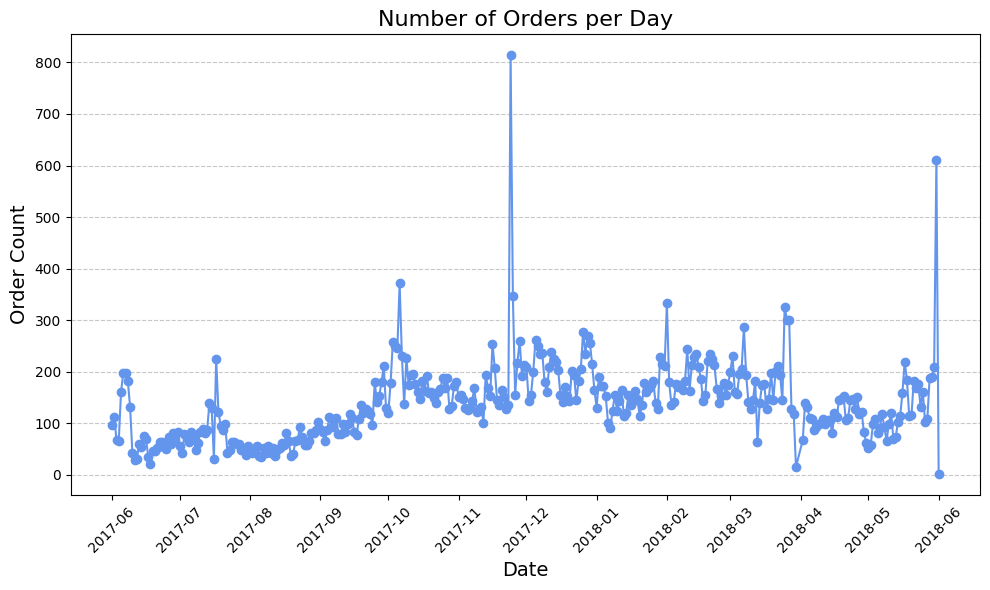

In [28]:
# Gráfico de pedidos por día
plt.figure(figsize=(10, 6))
plt.plot(orders_per_day['buy_ts'], orders_per_day['order_count'], color='cornflowerblue', marker='o')
plt.title('Number of Orders per Day', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Order Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatear el eje X para mostrar etiquetas mensuales
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Conclusiones:** El gráfico muestra fluctuaciones en el número de pedidos diarios, con picos significativos en diciembre de 2017 y un aumento menor en junio de 2018. Estos picos pueden estar relacionados con eventos o promociones de temporada. Además, hay una tendencia al alza gradual en los pedidos hacia finales de 2017, seguida de una estabilización en niveles más bajos en los meses siguientes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Exacto, normalmente esos picos de comportamiento anormal suelen deberse a periodos de promociones. Bien hecho.

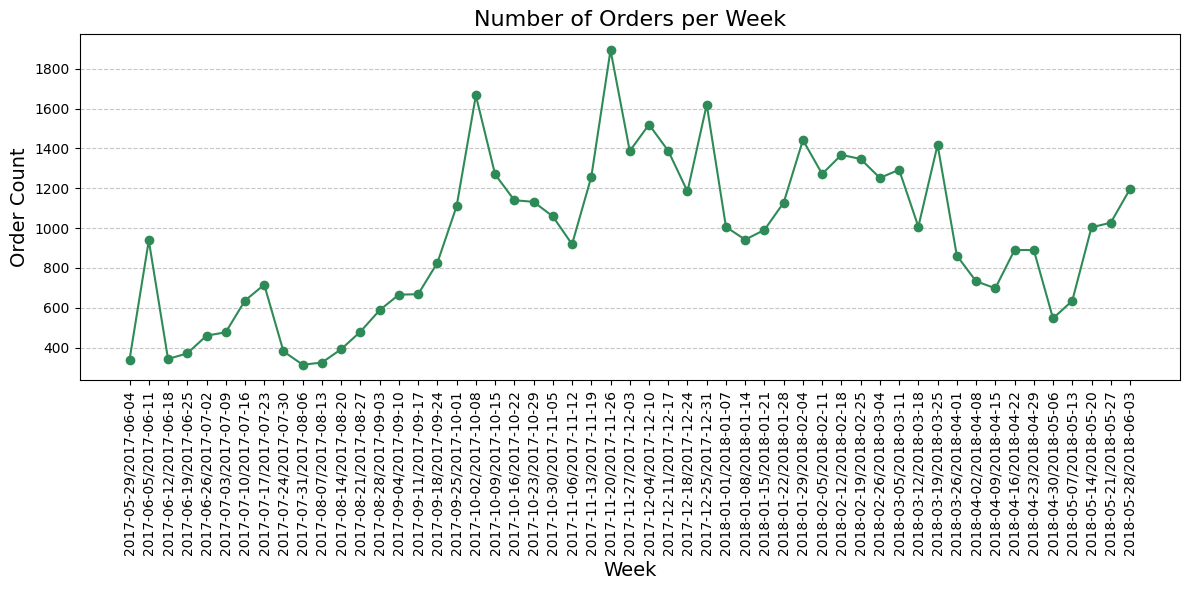

In [29]:
# Gráfico de pedidos por semana
plt.figure(figsize=(12, 6))
plt.plot(orders_per_week['buy_ts'].astype(str), orders_per_week['order_count'], color='seagreen', marker='o')
plt.title('Number of Orders per Week', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Order Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Conclusiones:** El gráfico semanal muestra un aumento constante en los pedidos hasta alcanzar su punto máximo en octubre y noviembre de 2017, coincidiendo probablemente con la temporada de promociones de fin de año. Después de este periodo, los pedidos disminuyen y se estabilizan con algunas fluctuaciones. Hacia el final del periodo, se observa una ligera tendencia de recuperación.

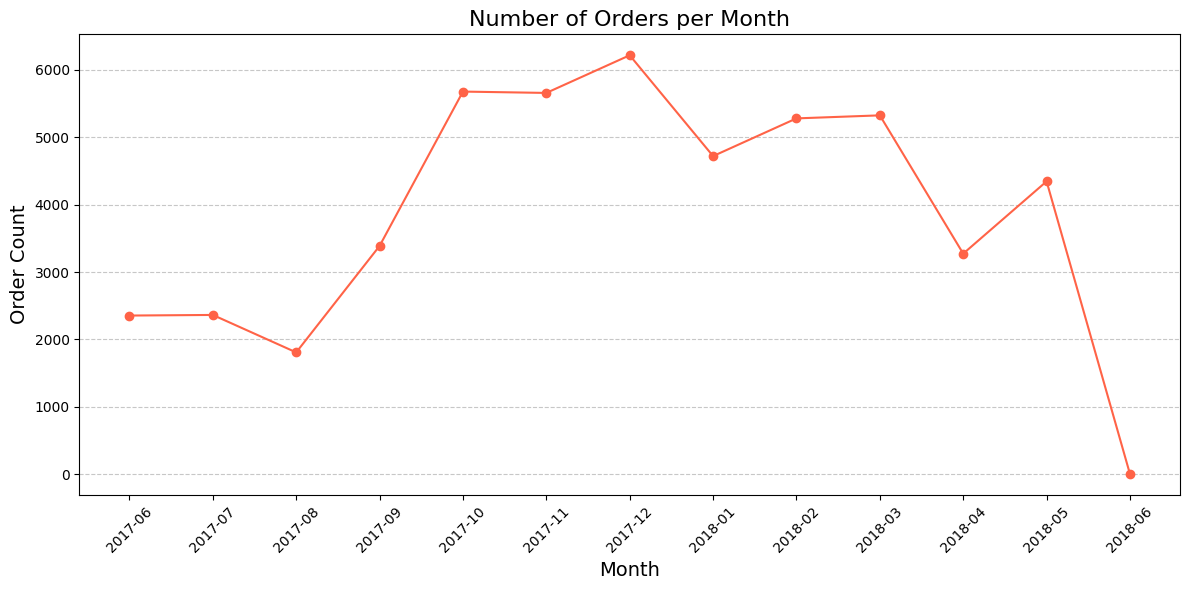

In [30]:
# Gráfico de pedidos por mes
plt.figure(figsize=(12, 6))
plt.plot(orders_per_month['buy_ts'].astype(str), orders_per_month['order_count'], color='tomato', marker='o')
plt.title('Number of Orders per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Order Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusiones:** El gráfico muestra una tendencia general de aumento en el número de pedidos después de Agosto de 2017 y Diciembre del mismo año. A partir de enero de 2018, el número de pedidos disminuye con algunos altibajos, se puede ver una caída pronunciada en junio de 2018, debido a que de junio de 2018 solo tenemos un dato, así que es esperable.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

A pesar de que esa última caida es justificable, es importante ver que apartir de diciembre del 2017 la tendencia es a la baja ¿A qué podría deberse? 

<div class="alert alert-block alert-info">
<b>Creería que es por el fin de la temporada navideña en donde sube considerablemente el consumo, el mercado podría estar saturado temporalmente pues los clientes realizaron sus compras principales a final de año, esperaría que hacía septiembre del 2018 volviera a subir!</b> <a class="tocSkip"></a>
</div>

In [31]:
# Tamaño promedio de compra
average_order_size = df_orders['revenue'].mean()
average_order_size

4.999646930477041

In [32]:
# Calcular el LTV por usuario
ltv_per_user = df_orders.groupby('uid')['revenue'].sum().reset_index(name='ltv')
print(ltv_per_user)
print(ltv_per_user.describe())

                        uid    ltv
0           313578113262317   0.55
1          1575281904278712   3.05
2          2429014661409475  73.33
3          2464366381792757   2.44
4          2551852515556206  10.99
...                     ...    ...
36518  18445147675727495770   3.05
36519  18445407535914413204   0.88
36520  18445601152732270159   4.22
36521  18446156210226471712   9.78
36522  18446167067214817906   7.94

[36523 rows x 2 columns]
                uid           ltv
count  3.652300e+04  36523.000000
mean   9.213152e+18      6.901328
std    5.324792e+18     88.128535
min    3.135781e+14      0.000000
25%    4.615081e+18      1.470000
50%    9.245161e+18      3.050000
75%    1.383709e+19      5.800000
max    1.844617e+19  11810.180000


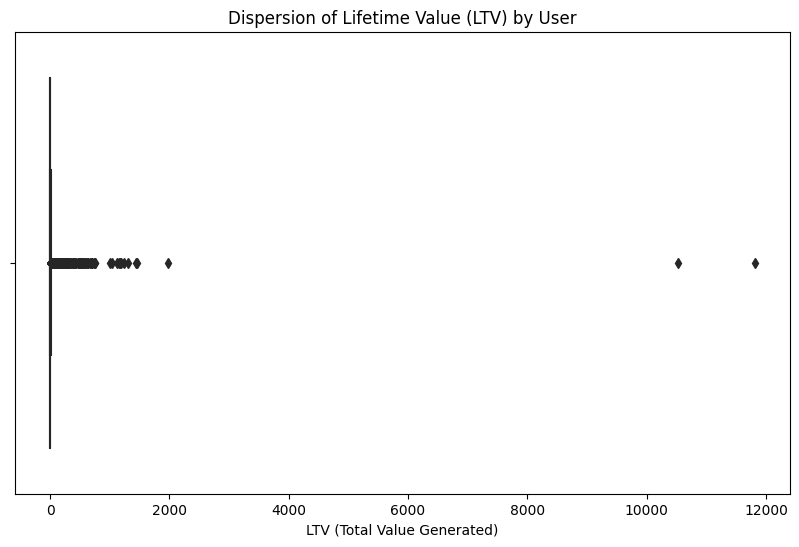

In [33]:
# Graficar el box plot del LTV por usuario
plt.figure(figsize=(10, 6))
sns.boxplot(x=ltv_per_user['ltv'], color='navy')
plt.title('Dispersion of Lifetime Value (LTV) by User')
plt.xlabel('LTV (Total Value Generated)')
plt.show()

**Conclusiones:** El gráfico muestra la dispersión del Lifetime Value (LTV) por usuario, que representa el valor total generado por cada cliente durante toda su relación con la empresa. La mayoría de los usuarios tienen un LTV bajo, concentrado cerca de cero, indicando que generan ingresos limitados. Sin embargo, existen pocos usuarios con un LTV significativamente alto, representando un aporte mucho mayor al negocio y siendo potencialmente clientes valiosos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

A pesar de que teniamos una buena señal respecto al corto periodo que tienen muchos usuarios en volver, este gráfico nos indica que existe un punto debil, debido a que la mayoría de usuarios tienen un ltv muy cercano a cero. 

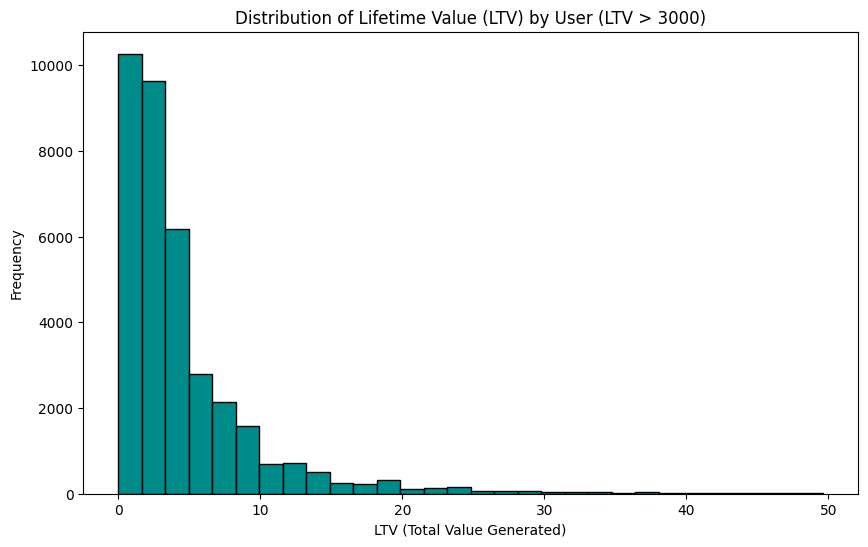

In [34]:
# Filtrar los valores de LTV mayores a 3000
ltv_filtered = ltv_per_user[ltv_per_user['ltv'] < 50]

# Graficar el histograma de LTV mayores a 50
plt.figure(figsize=(10, 6))
plt.hist(ltv_filtered['ltv'], bins=30, color='darkcyan', edgecolor='black')
plt.title('Distribution of Lifetime Value (LTV) by User (LTV > 3000)')
plt.xlabel('LTV (Total Value Generated)')
plt.ylabel('Frequency')
plt.show()

**Conclusión:** El gráfico muestra que la mayoría de los usuarios tienen un Lifetime Value (LTV) bajo, reflejando ingresos modestos generados durante su relación con la empresa. Conforme aumenta el LTV, la cantidad de usuarios disminuye notablemente, indicando que solo un pequeño grupo de clientes logra generar un alto valor para la empresa. Esta concentración en valores bajos y lo poco común de clientes con LTV elevado subraya la relevancia de enfocar estrategias en retener y optimizar el valor de estos pocos clientes con mayor impacto económico.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Precisamente acá lo esperado hubiera sido que el histograma estuviera cargado hacia la derecha, por lo que valdría la pena profundizar en como impulsar este cambio en favor de la compañia.

## Marketing

In [35]:
# Total de dinero que se gastó
total_cost = df_costs['costs'].sum()
print(f"Total gastado: {total_cost}")

Total gastado: 329131.62


In [36]:
# Gasto por fuente de adquisición
costs_by_source = df_costs.groupby('source_id')['costs'].sum().reset_index(name='total_cost')
print(costs_by_source)

   source_id  total_cost
0          1    20833.27
1          2    42806.04
2          3   141321.63
3          4    61073.60
4          5    51757.10
5          9     5517.49
6         10     5822.49


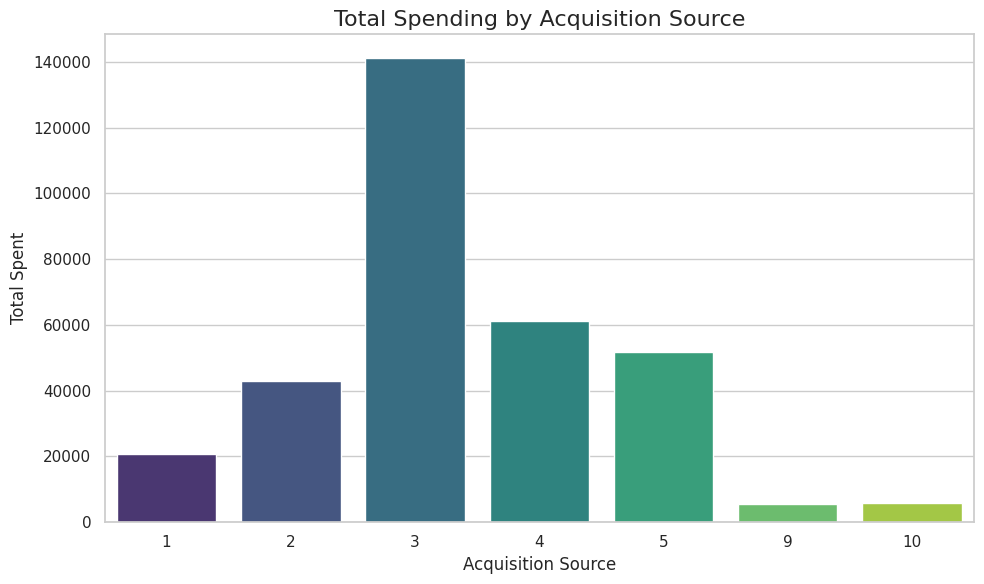

In [37]:
# Gasto por fuente de adquisición (usando el DataFrame 'costs_by_source' que ya calculamos)
sns.set(style="whitegrid")  # Estilo para los gráficos

plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='total_cost', data=costs_by_source, palette='viridis')

# Añadir título y etiquetas
plt.title('Total Spending by Acquisition Source', fontsize=16)
plt.xlabel('Acquisition Source', fontsize=12)
plt.ylabel('Total Spent', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Conclusión:** Este gráfico muestra el gasto total de los usuarios según la fuente de adquisición. Claramente, la fuente "3" es la que genera el mayor gasto, seguida por las fuentes "4" y "5". En contraste, las fuentes "9" y "10" registran un gasto significativamente menor.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Muy bien realizado!

In [38]:
# Gasto a lo largo del tiempo
costs_by_day = df_costs.groupby('dt')['costs'].sum().reset_index(name='total_cost')
print(costs_by_day)

            dt  total_cost
0   2017-06-01      735.26
1   2017-06-02      721.19
2   2017-06-03      450.85
3   2017-06-04      761.16
4   2017-06-05      821.44
..         ...         ...
359 2018-05-27      532.87
360 2018-05-28      619.44
361 2018-05-29      784.79
362 2018-05-30     1183.00
363 2018-05-31     2153.70

[364 rows x 2 columns]


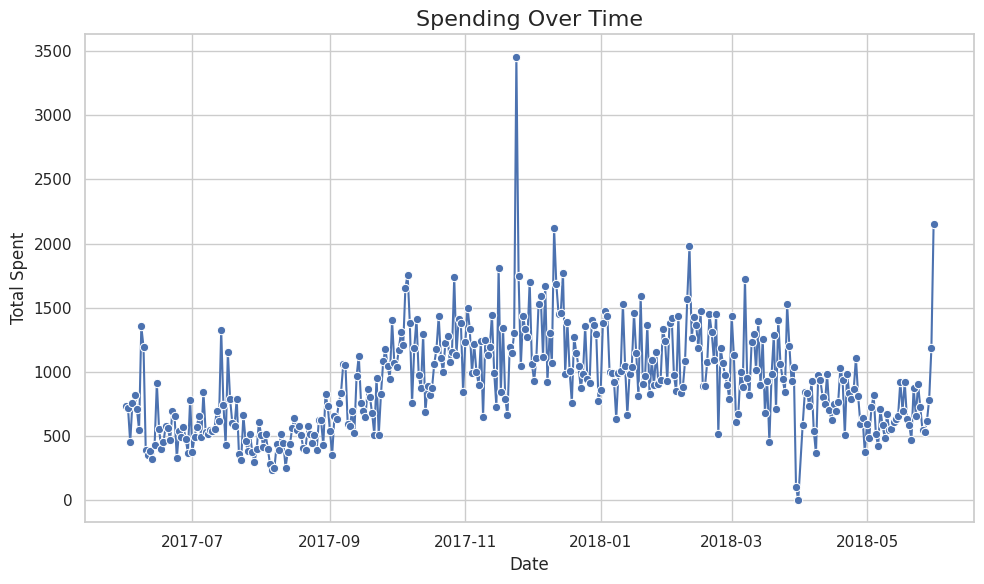

In [39]:
# Gasto a lo largo del tiempo (usando el DataFrame 'costs_by_day' que ya calculamos)
plt.figure(figsize=(10, 6))
sns.lineplot(x='dt', y='total_cost', data=costs_by_day, marker='o', color='b')

# Añadir título y etiquetas
plt.title('Spending Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Spent', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Conclusiones:** El gráfico muestra fluctuaciones en el gasto a lo largo del tiempo, con picos significativos en diciembre de 2017 y un aumento menor en Mayo de 2018. Estos picos pueden estar relacionados con eventos o promociones de temporada. Además, hay una tendencia al alza gradual en los gastos hacia finales de 2017, seguida de una estabilización en niveles más bajos en los meses siguientes.

In [40]:
# Costo de adquisición de clientes de cada una de las fuentes

# Unir la tabla 'df_orders' con 'df_visits' en 'uid' para obtener la fuente de adquisición
orders_with_source = pd.merge(df_orders, df_visits[['uid', 'source_id']], on='uid', how='inner')

# Calcular el número de clientes únicos que realizaron compras por fuente de adquisición
clients_per_source = orders_with_source.groupby('source_id')['uid'].nunique().reset_index(name='unique_clients')

# Calcular el gasto total por fuente de adquisición (de la tabla 'costs')
costs_by_source = df_costs.groupby('source_id')['costs'].sum().reset_index(name='total_cost')

# Unir los dos DataFrames para obtener tanto el gasto total como el número de clientes
cac_data = pd.merge(clients_per_source, costs_by_source, on='source_id')

# Calcular el Costo de Adquisición de Clientes (CAC)
cac_data['cac'] = cac_data['total_cost'] / cac_data['unique_clients']

# Ordenar los datos por CAC para que la gráfica sea más clara
cac_data = cac_data.sort_values(by='cac', ascending=False)
print(cac_data[['source_id', 'cac']])

   source_id        cac
2          3  10.206676
1          2   5.859828
4          5   5.096209
3          4   4.284965
6         10   3.283976
0          1   2.918642
5          9   1.975471


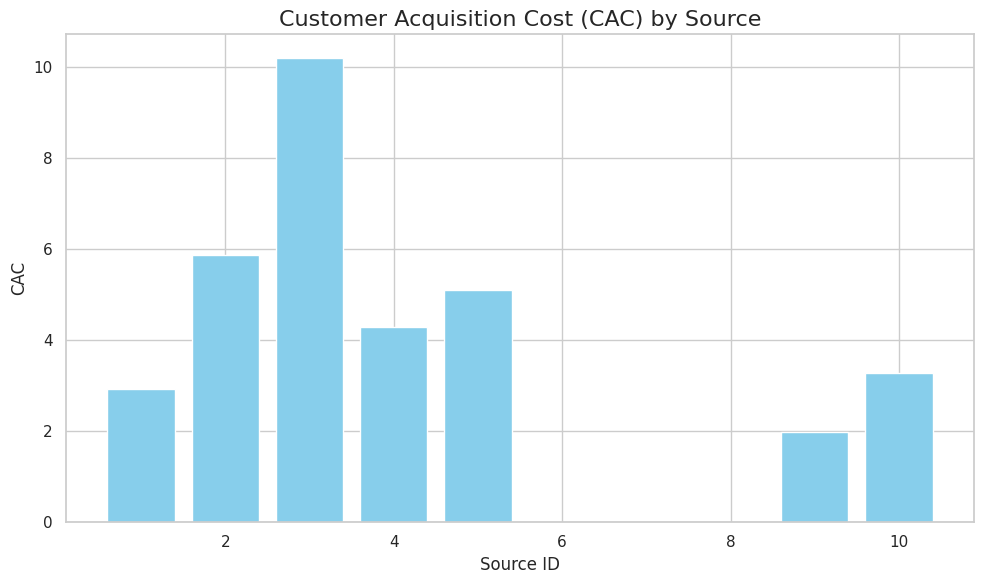

In [41]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(cac_data['source_id'], cac_data['cac'], color='skyblue')

# Agregar etiquetas y título en inglés
plt.title('Customer Acquisition Cost (CAC) by Source', fontsize=16)
plt.xlabel('Source ID', fontsize=12)
plt.ylabel('CAC', fontsize=12)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

**Conclusiones:** Este gráfico muestra el costo de adquisición de clientes (CAC) según la fuente de adquisición. La fuente "3" presenta el CAC más alto, seguida de las fuentes "2" y "5". En cambio, la fuente "9" tiene el CAC más bajo. Las fuentes (6, 7 y 8) no incurrieron en costos para adquirir clientes, posiblemente porque los usuarios llegaron de manera orgánica o a través de canales gratuitos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Excelente análisis, estoy totalmente de acuerdo contigo. Además felicidades por los gráficos, quedaron excelentes.

In [42]:
# Calculra Retorno sobre la Inversión en Marketing (ROMI) (Ingresos-Costos)/Costos

# Calcular los ingresos totales por fuente de adquisición
revenue_per_source = df_orders.merge(df_visits[['uid', 'source_id']], on='uid', how='inner')
revenue_per_source = revenue_per_source.groupby('source_id')['revenue'].sum().reset_index(name='total_revenue')
revenue_per_source

,source_id,total_revenue
0,1,2.298200e+06
1,2,2.638189e+06
2,3,2.966880e+05
3,4,4.966902e+05
4,5,1.181477e+06
5,7,1.220000e+00
6,9,3.634225e+04
7,10,1.461923e+04


In [43]:
# Costos totales por fuente de adquisición
costs_by_source

,source_id,total_cost
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [44]:
# Unir los ingresos y costos por fuente de adquisición
romi_data = pd.merge(revenue_per_source, costs_by_source, on='source_id')
romi_data

,source_id,total_revenue,total_cost
0,1,2.298200e+06,20833.27
1,2,2.638189e+06,42806.04
2,3,2.966880e+05,141321.63
3,4,4.966902e+05,61073.60
4,5,1.181477e+06,51757.10
5,9,3.634225e+04,5517.49
6,10,1.461923e+04,5822.49


In [45]:
# Calcular el ROMI
romi_data['romi'] = (romi_data['total_revenue'] - romi_data['total_cost']) / romi_data['total_cost']

# Ordenar por ROMI para visualización
romi_data = romi_data.sort_values(by='romi', ascending=False)

# Mostrar los resultados
print(romi_data[['source_id', 'romi']])

   source_id        romi
0          1  109.313944
1          2   60.631237
4          5   21.827344
3          4    7.132649
5          9    5.586736
6         10    1.510821
2          3    1.099381


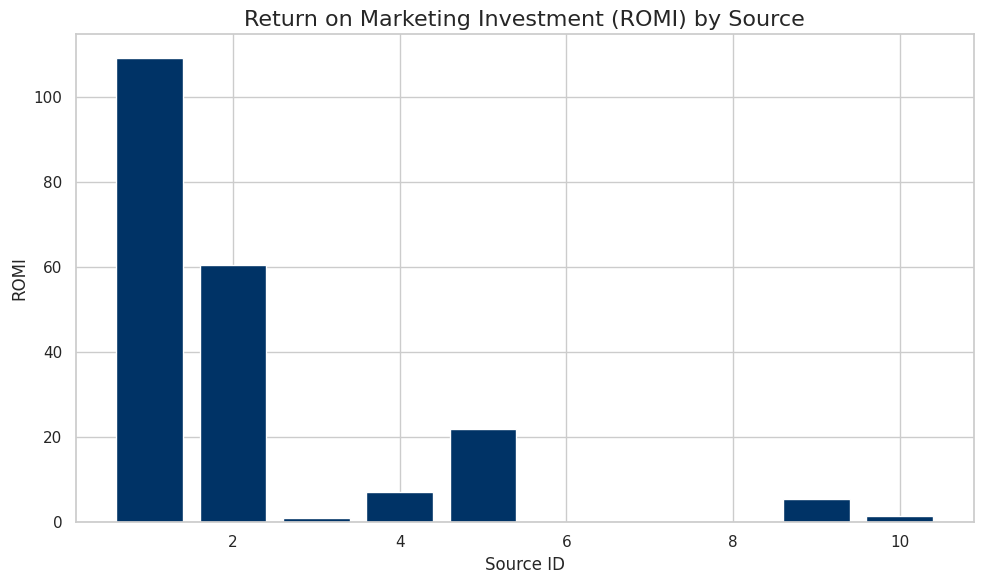

In [46]:
# Graficar el ROMI por fuente de adquisición
plt.figure(figsize=(10, 6))
plt.bar(romi_data['source_id'], romi_data['romi'], color='#003366')

# Etiquetas en inglés
plt.title('Return on Marketing Investment (ROMI) by Source', fontsize=16)
plt.xlabel('Source ID', fontsize=12)
plt.ylabel('ROMI', fontsize=12)
plt.tight_layout()

plt.show()

**Conclusiones:** Este gráfico de barras muestra el retorno de inversión en marketing (ROMI) por fuente. Algunas fuentes generan un rendimiento significativamente mayor como la "1" y la "2", mientras que otras aportan valores bajos o insignificantes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Muy bien hecho!

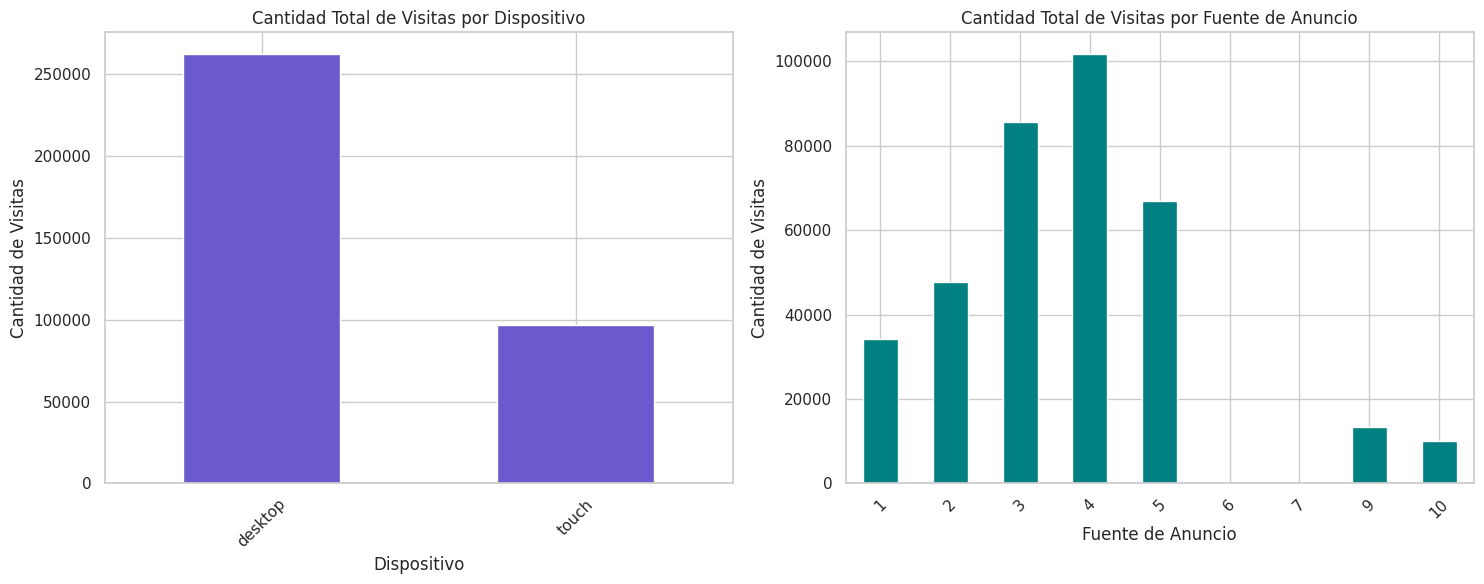

In [47]:
# Calcular visitas mensuales por dispositivo y fuente de anuncios
monthly_visits_device = df_visits.groupby([df_visits['start_ts'].dt.to_period('M'), 'device']).size().unstack()
monthly_visits_source = df_visits.groupby([df_visits['start_ts'].dt.to_period('M'), 'source_id']).size().unstack()

# Sumar la cantidad de visitas por dispositivo y por fuente en todo el período
total_visits_device = monthly_visits_device.sum()
total_visits_source = monthly_visits_source.sum()

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras para la cantidad total de visitas por dispositivo
total_visits_device.plot(kind='bar', ax=axes[0], color='#6A5ACD', title='Cantidad Total de Visitas por Dispositivo')
axes[0].set_xlabel('Dispositivo')
axes[0].set_ylabel('Cantidad de Visitas')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para la cantidad total de visitas por fuente de anuncios
total_visits_source.plot(kind='bar', ax=axes[1], color='#008080', title='Cantidad Total de Visitas por Fuente de Anuncio')
axes[1].set_xlabel('Fuente de Anuncio')
axes[1].set_ylabel('Cantidad de Visitas')
axes[1].tick_params(axis='x', rotation=45)

# Ajustar la presentación de los gráficos
plt.tight_layout()
plt.show()

**Conclusiones:** El gráfico de la izquierda muestra que los dispositivos de escritorio generan significativamente más visitas que los dispositivos táctiles. En el gráfico de la derecha, las fuentes de anuncio 3 y 4 destacan con el mayor número de visitas, mientras que las fuentes 9 y 10 son las menos efectivas. Esto evidencia una diferencia notable en el rendimiento por dispositivo y por fuente de tráfico.

In [48]:
# Calcular conversiones: visitas en las que hay una compra registrada
user_conversion['converted'] = ~user_conversion['buy_ts'].isna()

# Número total de visitas y número de conversiones
total_visits = user_conversion['uid'].nunique()
total_conversions = user_conversion['converted'].sum()

# Tasa de conversión
conversion_rate = (total_conversions / total_visits) * 100

print("Número de visitas:", total_visits)
print("Número de conversiones:", total_conversions)
print("Tasa de conversión:", conversion_rate, "%")

Número de visitas: 228169
Número de conversiones: 97394
Tasa de conversión: 42.68502732623625 %


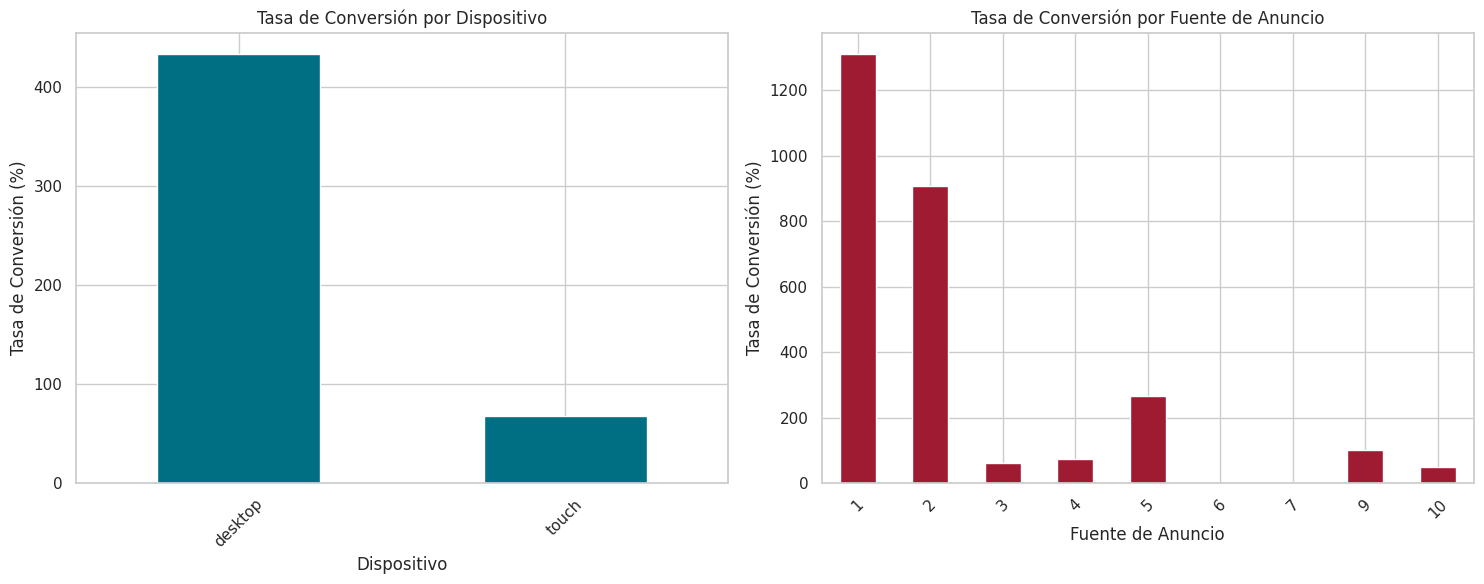

In [49]:
# Merge para agregar los datos de compra a df_visits
visits_with_orders = pd.merge(df_visits, df_orders[['uid', 'buy_ts', 'revenue']], on='uid', how='left')

# Crear una columna que indique si hubo conversión (1 si existe una compra, 0 si no)
visits_with_orders['converted'] = visits_with_orders['buy_ts'].notna().astype(int)

# Calcular la tasa de conversión por dispositivo
conversion_by_device = visits_with_orders.groupby('device').agg(
    total_visits=('uid', 'nunique'),  # Total de visitas por dispositivo
    conversions=('converted', 'sum')  # Total de conversiones por dispositivo
)
conversion_by_device['conversion_rate'] = (conversion_by_device['conversions'] / conversion_by_device['total_visits']) * 100

# Calcular la tasa de conversión por fuente de anuncios
conversion_by_source = visits_with_orders.groupby('source_id').agg(
    total_visits=('uid', 'nunique'),  # Total de visitas por fuente
    conversions=('converted', 'sum')  # Total de conversiones por fuente
)
conversion_by_source['conversion_rate'] = (conversion_by_source['conversions'] / conversion_by_source['total_visits']) * 100

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras de la tasa de conversión por dispositivo
conversion_by_device['conversion_rate'].plot(kind='bar', ax=axes[0], color='#006F84')
axes[0].set_title('Tasa de Conversión por Dispositivo')
axes[0].set_xlabel('Dispositivo')
axes[0].set_ylabel('Tasa de Conversión (%)')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras de la tasa de conversión por fuente de anuncios
conversion_by_source['conversion_rate'].plot(kind='bar', ax=axes[1], color='#9E1B32')
axes[1].set_title('Tasa de Conversión por Fuente de Anuncio')
axes[1].set_xlabel('Fuente de Anuncio')
axes[1].set_ylabel('Tasa de Conversión (%)')
axes[1].tick_params(axis='x', rotation=45)

# Ajustar la presentación de los gráficos
plt.tight_layout()
plt.show()

**Conclusiones:** El gráfico de la izquierda muestra que los dispositivos de escritorio tienen una tasa de conversión significativamente mayor en comparación con los dispositivos táctiles, destacando su efectividad para convertir visitas en acciones. En el gráfico de la derecha, las fuentes 1 y 2 sobresalen con las tasas de conversión más altas, mientras que otras fuentes, como la 3 y la 10, tienen tasas considerablemente más bajas.

In [50]:
# Filtrar las visitas que resultaron en una compra
purchases_with_device_source = visits_with_orders[visits_with_orders['converted'] == 1]

# Calcular el tamaño promedio de compra por dispositivo
avg_purchase_by_device = purchases_with_device_source.groupby('device').agg(
    avg_purchase_size=('revenue', 'mean')
)

# Calcular el tamaño promedio de compra por fuente de anuncios
avg_purchase_by_source = purchases_with_device_source.groupby('source_id').agg(
    avg_purchase_size=('revenue', 'mean')
)

# Mostrar los resultados
print("Tamaño promedio de compra por dispositivo:\n\n", avg_purchase_by_device)
print("\nTamaño promedio de compra por fuente de anuncios:\n\n", avg_purchase_by_source)

Tamaño promedio de compra por dispositivo:

          avg_purchase_size
device                    
desktop           9.040895
touch            10.579314

Tamaño promedio de compra por fuente de anuncios:

            avg_purchase_size
source_id                   
1                   9.242265
2                  11.071013
3                   6.344095
4                   7.923842
5                   7.781887
7                   1.220000
9                   3.806667
10                  3.630303


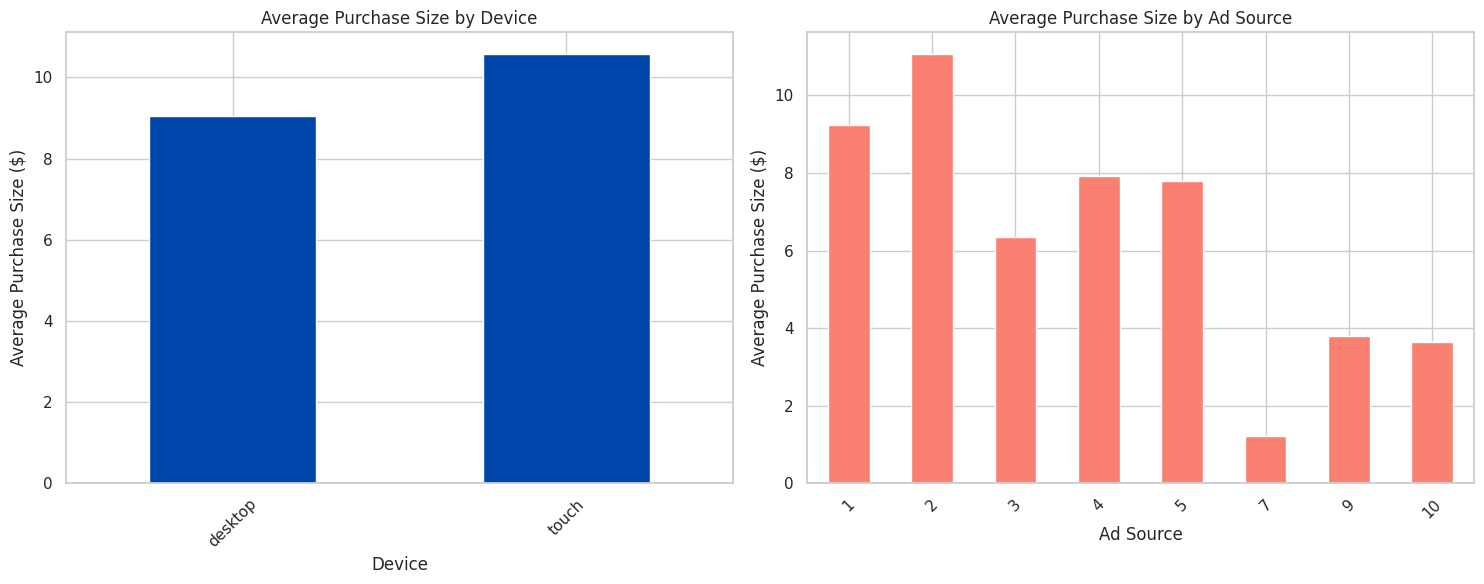

In [51]:
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras del tamaño promedio de compra por dispositivo
avg_purchase_by_device['avg_purchase_size'].plot(kind='bar', ax=axes[0], color='#0047AB')
axes[0].set_title('Average Purchase Size by Device')
axes[0].set_xlabel('Device')
axes[0].set_ylabel('Average Purchase Size ($)')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras del tamaño promedio de compra por fuente de anuncios
avg_purchase_by_source['avg_purchase_size'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Average Purchase Size by Ad Source')
axes[1].set_xlabel('Ad Source')
axes[1].set_ylabel('Average Purchase Size ($)')
axes[1].tick_params(axis='x', rotation=45)

# Ajustar la presentación de los gráficos
plt.tight_layout()
plt.show()

**Conclusiones:** El gráfico de la izquierda muestra que los dispositivos de escritorio tienen una compra promedio más baja en comparación con los dispositivos táctiles, destacando la efectividad de los dispositivos táctiles para realizar compras más altas. En el gráfico de la derecha, las fuentes 1 y 2 sobresalen con las compras promedio más altas, mientras que la fuente 7 es considerablemente más baja.

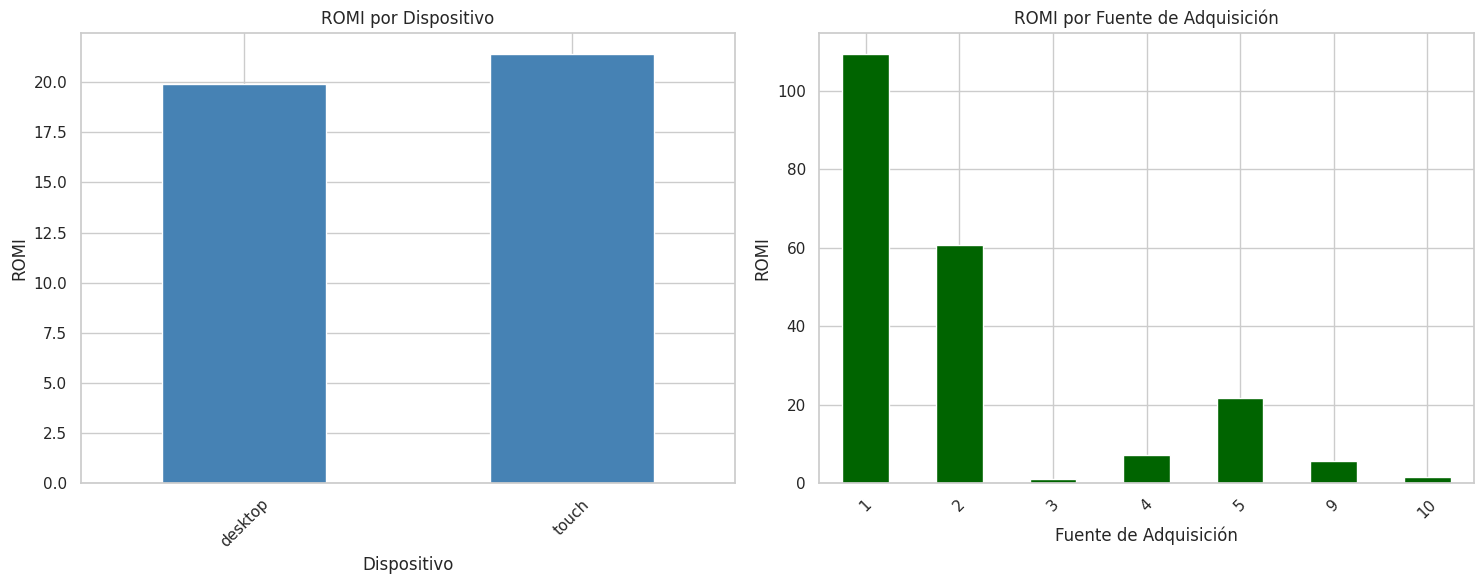

In [52]:
# ROMI a lo largo del tiempo por dispositivo y fuente

# Realizar el merge entre romi_data y df_visits para incluir device y source_id
romi_data_visits = pd.merge(romi_data, df_visits[['uid', 'device', 'source_id']].drop_duplicates(), on='source_id', how='left')

# ROMI por dispositivo
romi_by_device = romi_data_visits.groupby('device')['romi'].mean()

# ROMI por fuente de adquisición
romi_by_source = romi_data_visits.groupby('source_id')['romi'].mean()

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de ROMI por dispositivo
romi_by_device.plot(kind='bar', ax=axes[0], color='#4682B4')
axes[0].set_title('ROMI por Dispositivo')
axes[0].set_xlabel('Dispositivo')
axes[0].set_ylabel('ROMI')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de ROMI por fuente de adquisición
romi_by_source.plot(kind='bar', ax=axes[1], color='darkgreen')
axes[1].set_title('ROMI por Fuente de Adquisición')
axes[1].set_xlabel('Fuente de Adquisición')
axes[1].set_ylabel('ROMI')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

**Conclusiones:** El gráfico de la izquierda muestra el retorno de inversión en marketing (ROMI) por dispositivo, mostrando que los dispositivos de escritorio tienen un retorno mas bajo en comparación con los dispositivos táctiles. En el gráfico de la derecha, el retorno de inversión en marketing (ROMI) de las fuentes 1 y 2 sobresalen en comparación con las demás.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Felicidades, no me queda otra cosa más que decir que realizaste un gran trabajo. En cada punto los gráficos se ven muy bien y las conclusiones son muy correctas. Bien hecho. 

## Conclusión

Luego de realizar el análisis de métricas, sugiero que el equipo de marketing enfoque su presupuesto en las siguientes áreas clave:

1. ***Invertir en dispositivos táctiles:*** A pesar de que los dispositivos de escritorio generan más visitas y tienen una tasa de conversión superior, los dispositivos táctiles muestran un mayor promedio de compra y un mejor retorno de inversión en marketing (ROMI). Esto indica que las campañas dirigidas a usuarios de dispositivos táctiles generan un mayor valor por cliente, por lo que sería estratégico destinar una porción considerable del presupuesto en campañas específicamente orientadas a estos dispositivos. Este enfoque puede maximizar los ingresos y mejorar el rendimiento global de la inversión.

2.	***Priorizar las fuentes de adquisición con alto ROMI y CAC favorable:*** Las fuentes de adquisición 1 y 2 han demostrado tener el mayor retorno de inversión en marketing (ROMI) y la mayor compra promedio por usuario. Estas plataformas no solo atraen a clientes que gastan más, sino que también convierten a un ritmo favorable, haciendo que la inversión en ellas sea más rentable. 

**Fundamento Basado en métricas clave:** <br>
- ***ROMI:*** Mide el rendimiento de cada fuente en términos de retorno sobre el gasto en marketing. Las fuentes 1 y 2 destacan con valores altos, lo que garantiza un rendimiento positivo de la inversión.<br>
- ***Promedio de compra y tasa de conversión por dispositivo:*** A pesar de la mayor cantidad de visitas en escritorio, los dispositivos táctiles tienen un valor de compra promedio superior y un ROMI más alto, lo cual apunta a un mayor retorno por cada cliente que compra en un dispositivo táctil.<br>
- ***Costo de adquisición de clientes (CAC):*** El CAC es clave para evitar gastos excesivos en fuentes de baja conversión. Por ejemplo, la fuente 3 tienen un CAC alto sin retorno justificado, sugiriendo que debe evitarse.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Excelentes conclusiones! 